In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy as scipy
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

df1=pd.read_csv("../data/Student_performance_data.csv")
df1.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [3]:
df1.corr()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


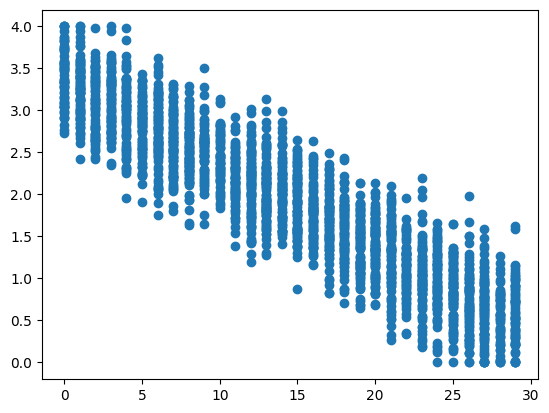

In [4]:
plt.scatter(data=df1,x="Absences",y="GPA")


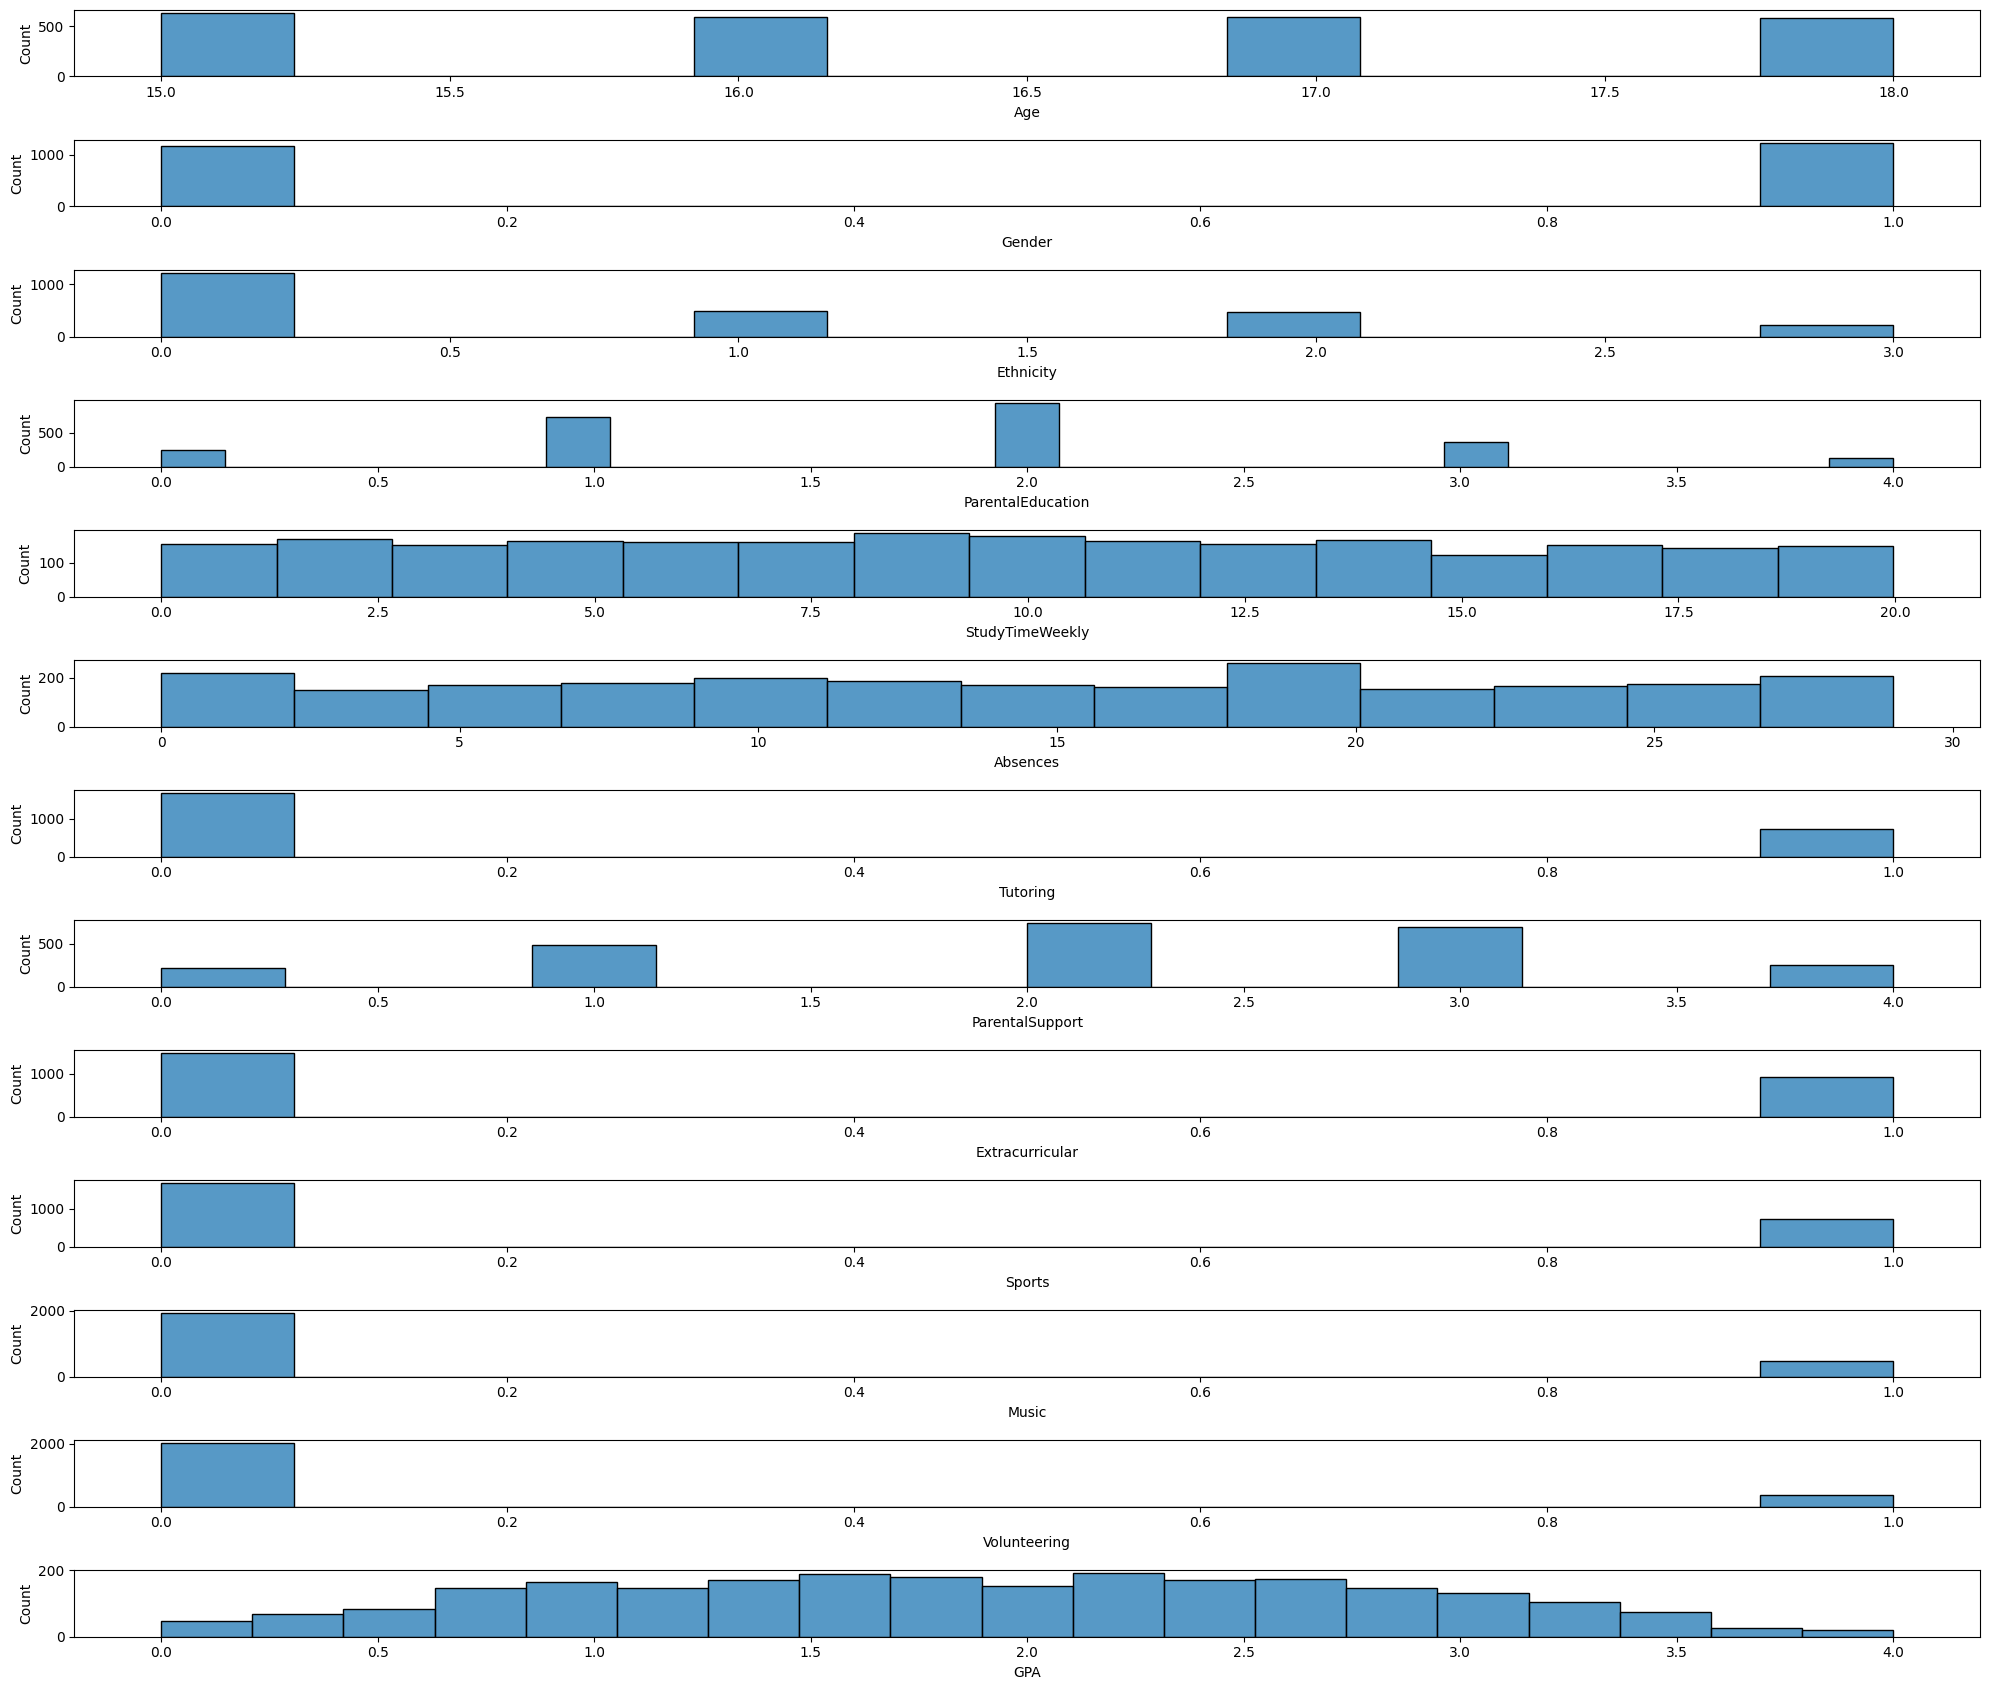

In [5]:
#output_var_name = "species"
#features = all_vars.drop(output_var_name).to_list()


all_vars = df1.columns
output_var_name1 = "StudentID"
output_var_name2 = "GradeClass"
features = all_vars.drop(output_var_name1).drop(output_var_name2).to_list()
plt.figure(figsize=(20, 17))
for i, col in enumerate(features):
    plt.subplot(13,1,i+1)
    sns.histplot(df1[col])
plt.tight_layout()
plt.show()

In [6]:
#grouped=df1.groupby("StudyTimeWeekly")

#plt.scatter(data=df1,x="StudyTimeWeekly",y="GPA")
#df1 = pd.DataFrame(np.random.randn(100, 3))

#df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]
#df1[np.abs(df1.Data-df1.Data.mean()) <= (3*df1.Data.std())]
#df_filtered=df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]
df1.describe()
#df_filtered.describe()

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


   return outliers

#for label, content in df1.items():
   # print(f'label: {label}')
   # print(f'content: {content}')

for  label, content in df1.items():
    print(f'label: {label}')
    outliers=find_outliers_IQR(df1[label])
    print("number of outliers: "+ str(len(outliers)))

    print("max outlier value: "+ str(outliers.max()))

    print("min outlier value: "+ str(outliers.min()))     



#outliers=find_outliers_IQR(df1["StudyTimeWeekly"])
#print("number of outliers: "+ str(len(outliers)))

#print("max outlier value: "+ str(outliers.max()))

#print("min outlier value: "+ str(outliers.min()))


label: StudentID
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: Age
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: Gender
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: Ethnicity
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: ParentalEducation
number of outliers: 120
max outlier value: 4
min outlier value: 4
label: StudyTimeWeekly
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: Absences
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: Tutoring
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: ParentalSupport
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: Extracurricular
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: Sports
number of outliers: 0
max outlier value: nan
min outlier value: nan
label: Music
number of outliers: 471
max outlier value:

In [7]:
# Shuffle the dataset
shuffled_indices = np.random.RandomState(seed=42).permutation(len(df1))

In [8]:
# Calculate split index
test_set_size = int(len(df1) * 0.2)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

In [9]:
X = df1.drop(columns=["StudentID", "GradeClass"])
le = LabelEncoder()
y = le.fit_transform(df1["GradeClass"])
y = to_categorical(y)

In [10]:
# Manual train-test split
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

In [11]:
# Manually scale features using training set statistics
train_mean = X_train.mean()
train_std = X_train.std(ddof=0)  

In [12]:
# Standardize
X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled = (X_test - train_mean) / train_std

In [13]:
# Define your manual classification report function
def manual_classification_report(y_true, y_pred):
    labels = np.unique(np.concatenate((y_true, y_pred)))  # Get all unique labels from both true and predicted values
    report = []  # lsit that store the formatted string for each class metrics
    for label in labels:
        tp = np.sum((y_pred == label) & (y_true == label))  # True Positives: Correctly predicted positive labels
        fp = np.sum((y_pred == label) & (y_true != label))  # False Positives: Incorrectly predicted positive labels
        fn = np.sum((y_pred != label) & (y_true == label))  # False Negatives: Missed positive labels
        precision = tp / (tp + fp) if (tp + fp) else 0.0  # Precision is the ratio of true Positives to the total number of predicted positives 
        recall = tp / (tp + fn) if (tp + fn) else 0.0  # Recall is the ratio of true Positives to the total number of actual positives
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0.0  #calculates the harmonic mean of precision and recall
        support = np.sum(y_true == label)  # The number of occurrences of the actual label in the true labels
        
        #formatted to 2 decimal places.
        report.append(f"Class {label}:\n  Precision: {precision:.2f}  Recall: {recall:.2f}  F1-score: {f1:.2f}  Support: {support}")
    
    return "\n".join(report)  #report list joined but new line

# Define your manual confusion matrix function
def manual_confusion_matrix(y_true, y_pred):
    labels = sorted(set(y_true) | set(y_pred))  # Get all unique labels from both true and predicted values
    matrix = np.zeros((len(labels), len(labels)), dtype=int)  # square matrix of zeros 
    label_to_idx = {label: idx for idx, label in enumerate(labels)}  #Create a mapping from labels to indices
    
    for t, p in zip(y_true, y_pred):  #populatating the matrix
        matrix[label_to_idx[t], label_to_idx[p]] += 1
    
    return matrix, labels  #retursn matrix and labels

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
Class 0:
  Precision: 0.00  Recall: 0.00  F1-score: 0.00  Support: 22
Class 1:
  Precision: 0.43  Recall: 0.47  F1-score: 0.45  Support: 49
Class 2:
  Precision: 0.60  Recall: 0.61  F1-score: 0.60  Support: 85
Class 3:
  Precision: 0.70  Recall: 0.55  F1-score: 0.61  Support: 86
Class 4:
  Precision: 0.88  Recall: 0.98  F1-score: 0.92  Support: 236


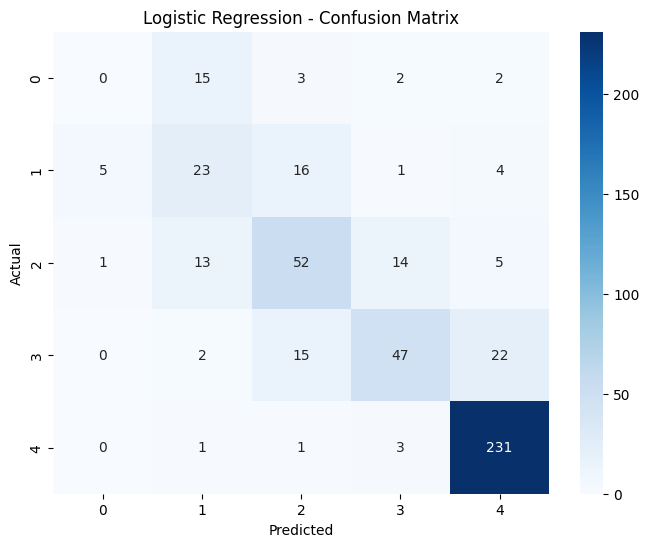

In [14]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis = 1)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_labels)
log_reg_preds = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(manual_classification_report(y_test_labels, log_reg_preds))
log_reg_cm, log_reg_labels = manual_confusion_matrix(y_test_labels, log_reg_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg_labels, yticklabels=log_reg_labels)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Classification Report:
Class 0:
  Precision: 0.92  Recall: 0.50  F1-score: 0.65  Support: 22
Class 1:
  Precision: 0.81  Recall: 0.86  F1-score: 0.83  Support: 49
Class 2:
  Precision: 0.92  Recall: 0.86  F1-score: 0.89  Support: 85
Class 3:
  Precision: 0.89  Recall: 0.90  F1-score: 0.89  Support: 86
Class 4:
  Precision: 0.94  Recall: 0.99  F1-score: 0.96  Support: 236


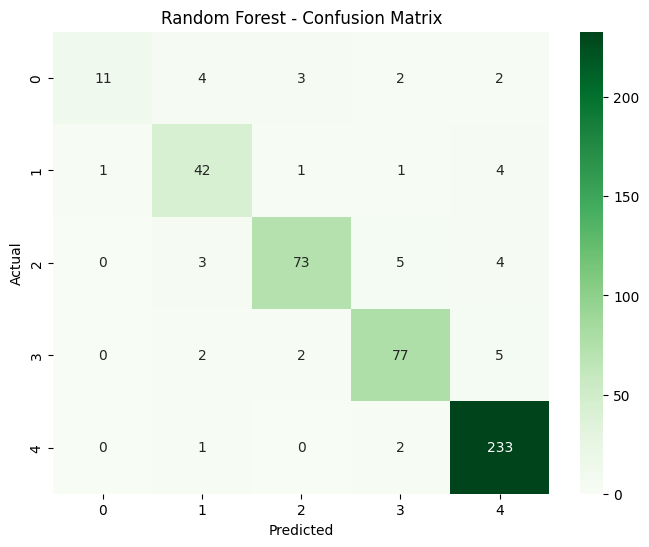

In [15]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train_labels)
rf_preds = rf.predict(X_test)
print("Random Forest Classification Report:")
print(manual_classification_report(y_test_labels, rf_preds))
rf_cm, rf_labels = manual_confusion_matrix(y_test_labels, rf_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=rf_labels, yticklabels=rf_labels)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost Classification Report:
Class 0:
  Precision: 0.81  Recall: 0.59  F1-score: 0.68  Support: 22
Class 1:
  Precision: 0.86  Recall: 0.86  F1-score: 0.86  Support: 49
Class 2:
  Precision: 0.94  Recall: 0.87  F1-score: 0.90  Support: 85
Class 3:
  Precision: 0.90  Recall: 0.90  F1-score: 0.90  Support: 86
Class 4:
  Precision: 0.94  Recall: 0.99  F1-score: 0.96  Support: 236


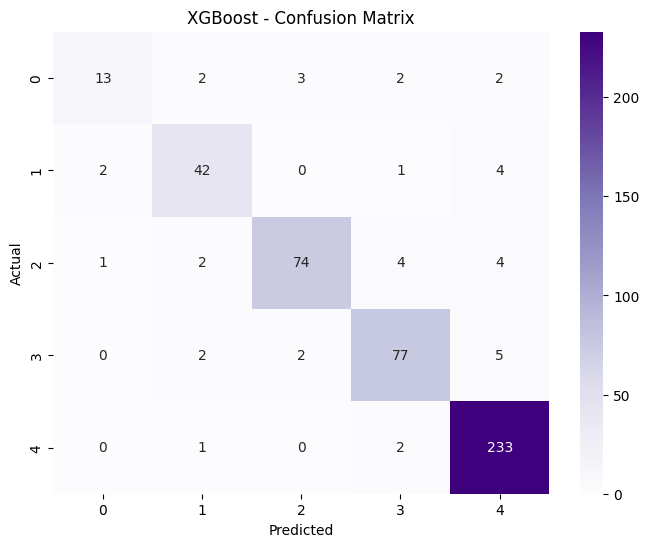

In [16]:
# XGBoost Classifier

import xgboost as xgbt

xgb_model = xgbt.XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_labels)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(manual_classification_report(y_test_labels, xgb_preds))
xgb_cm, xgb_labels = manual_confusion_matrix(y_test_labels, xgb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Purples', xticklabels=xgb_labels, yticklabels=xgb_labels)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
#Creating the model for Deep Learning
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Dense(64, activation = 'relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')
])
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,141 (12.27 KB)

 Trainable params: 3,141 (12.27 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#Running the deep learning model with processed data
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3464 - loss: 2.8564 - val_accuracy: 0.6110 - val_loss: 1.0001
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5701 - loss: 1.1502 - val_accuracy: 0.6188 - val_loss: 0.9841
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5939 - loss: 0.9976 - val_accuracy: 0.6371 - val_loss: 0.9780
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6330 - loss: 1.0009 - val_accuracy: 0.6632 - val_loss: 0.9498
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6156 - loss: 1.0000 - val_accuracy: 0.6423 - val_loss: 0.9471
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6537 - loss: 0.9241 - val_accuracy: 0.6449 - val_loss: 0.9304
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6627 - loss: 0.9204 - val_accuracy: 0.6736 - val_loss: 0.9120
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6644 - loss: 0.8964 - val_accuracy: 0.6945 - val_loss:

In [19]:
#Testing model accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy", test_acc)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7696 - loss: 0.6927 
Test Accuracy 0.7719665169715881


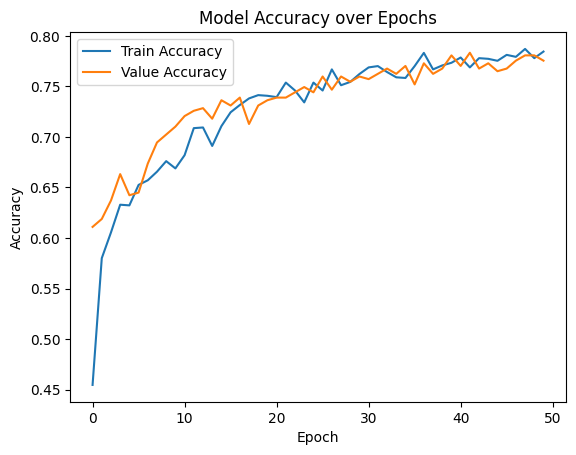

In [20]:
#For report, visualisation of model accuracy
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Value Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy over Epochs")
plt.show()

In [21]:
model.save("../models/student_performance.h5")